In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_percentage_error

***Define Problem:***
- dự đoán giá cổ phiếu Tesla dựa trên lịch sử giao dịch từ tháng 1/2013 đến tháng 2/2023 bằng model Linear Regression
- Đánh giá độ chính xác của mô hình bằng R2, adjust-R2, MSE, MAPE


***Input:***
- Giá mở cửa, giá đóng cửa, giá thấp nhất, giá cao nhất, khối lượng giao dịch

***Ouput:***
- Giá đóng cửa cúa cổ phiếu

***Prepare data cho model:***
- Nguồn dữ liệu: https://finance.yahoo.com/quote/TSLA
- Missing/Outlier
- Distribution của data

***Analyze Data:***
- Descriptive
- Correlation
- Predict

In [2]:
df = pd.read_csv('TeslaStocke.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-22,2.304000,2.370000,2.284000,2.346000,2.346000,28803000
1,2013-01-23,2.334667,2.416000,2.330667,2.400000,2.400000,23464500
2,2013-01-24,2.400000,2.514667,2.389333,2.466000,2.466000,29556000
3,2013-01-25,2.466667,2.502667,2.453333,2.465333,2.465333,19317000
4,2013-01-28,2.457333,2.580667,2.457333,2.535333,2.535333,29790000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2539 non-null   object 
 1   Open       2539 non-null   float64
 2   High       2539 non-null   float64
 3   Low        2539 non-null   float64
 4   Close      2539 non-null   float64
 5   Adj Close  2539 non-null   float64
 6   Volume     2539 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.0+ KB


Dữ liệu không có missing

Định dạng của date cần được format về dạng datetime

Xác định biến phụ thuộc cần dự đoán là giá đóng cửa y: Close

Xác định các biến độc lập là các biến còn lại

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2.539000e+03
mean,74.678429,76.379583,72.824258,74.639031,74.639031,1.137200e+08
std,102.121125,104.498214,99.456874,101.999312,101.999312,8.083709e+07
min,2.294000,2.330667,2.253333,2.292000,2.292000,6.603000e+06
25%,14.654666,14.838333,14.367000,14.618666,14.618666,6.381075e+07
50%,19.289333,19.766666,18.925333,19.369333,19.369333,8.992350e+07
75%,109.219334,111.708332,104.000000,108.083332,108.083332,1.341342e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

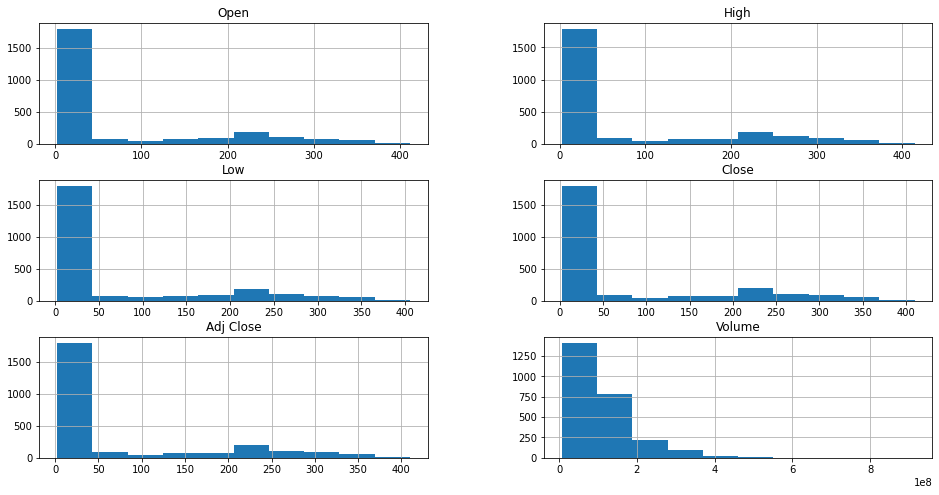

In [5]:
df.hist(figsize=(16,8))

Số liệu có phân phối lệch trái nhiều

<AxesSubplot:>

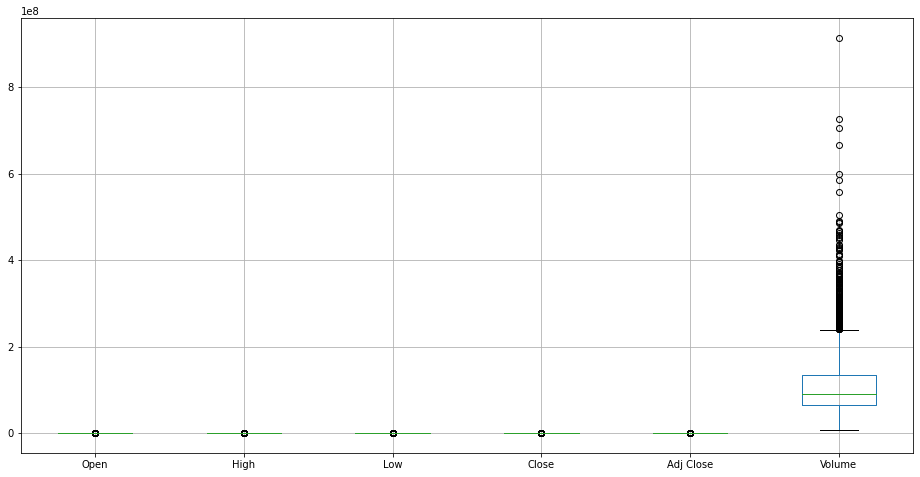

In [6]:
df.boxplot(figsize=(16,8))

Có thể thấy Volume là đặc tính có nhiều outlier

In [8]:
# Format lại Date:
# df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2539 non-null   datetime64[ns]
 1   Open       2539 non-null   float64       
 2   High       2539 non-null   float64       
 3   Low        2539 non-null   float64       
 4   Close      2539 non-null   float64       
 5   Adj Close  2539 non-null   float64       
 6   Volume     2539 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 139.0 KB


In [7]:
# Visulazie các đặc tính:
def visualize(df,col):
    plt.figure(figsize=(16,8))

    plt.subplot(1,2,1)
    sns.boxplot(df[col])
    plt.title('Spread')

    plt.subplot(1,2,2)
    sns.distplot(df[col])
    plt.title('Distribution')

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


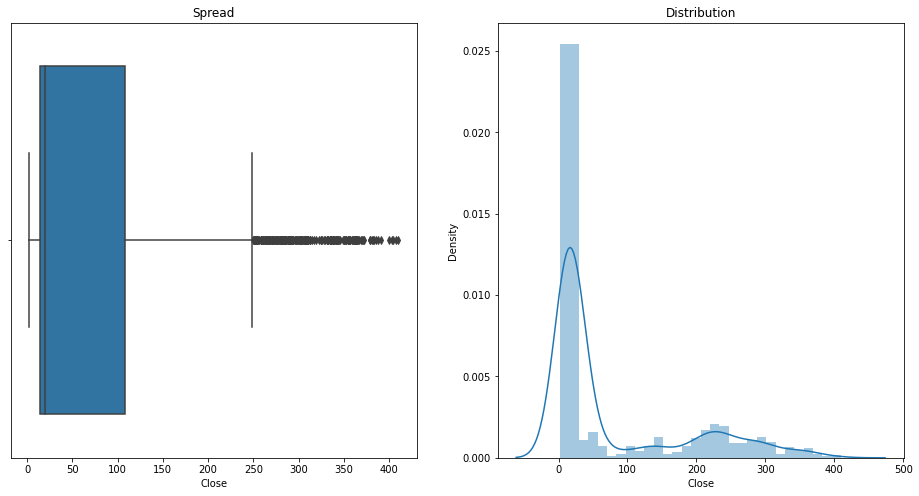

In [8]:
visualize(df,'Close')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2539 non-null   object 
 1   Open       2539 non-null   float64
 2   High       2539 non-null   float64
 3   Low        2539 non-null   float64
 4   Close      2539 non-null   float64
 5   Adj Close  2539 non-null   float64
 6   Volume     2539 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.0+ KB


In [18]:
X = df.drop(columns={'Close','Adj Close','Date'})
y= df['Close']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
y_train.shape

(1777,)

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [34]:
r2_score(y_test,y_pred)

0.9996686147841781

In [42]:
mean_absolute_percentage_error(y_test,y_pred)

0.008429066371075971

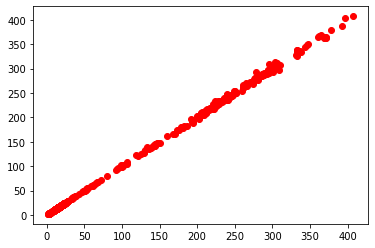

In [41]:
plt.scatter(y_pred, y_test, color='red') 